In [15]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [16]:
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

In [17]:
train_scaled = train_input.reshape(-1, 28,28,1)/ 255.0

In [18]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [19]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',padding='same', input_shape = (28,28,1)))
model.add(keras.layers.MaxPool2D(2))

In [20]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D(2))

In [21]:
model.add(keras.layers.Flatten())  #일자로 좍좍
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               313700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

세임패딩해서 28,28유지되고 32개의 필터를 써서
풀링 2x2라서 이미지 절반으로 줄어듦 
필터 64개 써서
또 절반으로
flatten하면 좍좍이니까 7*7*64 = 3136
Param은 웨잍+바이어스
32*(3*3+1) = 320
64*(3*3*32+1) = 18496



In [23]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [25]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopling_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled,train_target, epochs=20, validation_data = (val_scaled, val_target), callbacks= [checkpoint_cb, early_stopling_cb])

Epoch 1/20
1500/1500 [==============================] - 66s 43ms/step - loss: 0.5104 - accuracy: 0.8167 - val_loss: 0.3362 - val_accuracy: 0.8737
Epoch 2/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.3447 - accuracy: 0.8761 - val_loss: 0.2894 - val_accuracy: 0.8928
Epoch 3/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2972 - accuracy: 0.8922 - val_loss: 0.2497 - val_accuracy: 0.9059
Epoch 4/20
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2653 - accuracy: 0.9043 - val_loss: 0.2487 - val_accuracy: 0.9094
Epoch 5/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2391 - accuracy: 0.9117 - val_loss: 0.2317 - val_accuracy: 0.9165
Epoch 6/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2192 - accuracy: 0.9196 - val_loss: 0.2307 - val_accuracy: 0.9153
Epoch 7/20
1500/1500 [==============================] - 64s 43ms/step - loss: 0.2011 - accuracy: 0.9265 - val_loss: 0.2464 -

In [ ]:
keras.utils.plot_model(model)
keras.utils.plot_model(model, show_shapes = True, to_file = 'cnn-architecture.png', dpi = 300)  #거슬려서 이미지 지움 다시 실행하면 뜬당

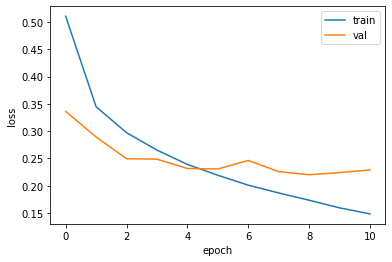

In [27]:


import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [28]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 12ms/step - loss: 0.2203 - accuracy: 0.9189


[0.22025854885578156, 0.918916642665863]

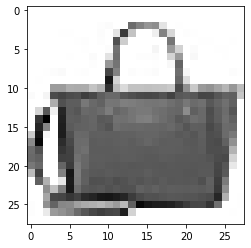

[[4.2840455e-17 2.9478507e-25 6.5149064e-21 2.4384641e-16 7.8144257e-18
  4.9192104e-21 5.6703285e-18 4.6259680e-21 1.0000000e+00 1.2607547e-26]]


In [31]:
plt.imshow(val_scaled[0].reshape(28,28), cmap = 'gray_r')
plt.show()

preds = model.predict(val_scaled[0:1])
print(preds)

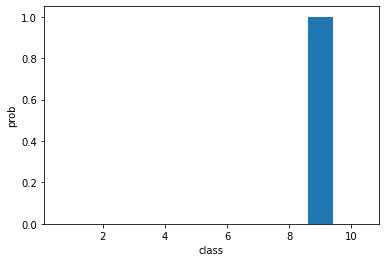

In [32]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [35]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵글 부츠']

In [36]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [37]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 12ms/step - loss: 0.2438 - accuracy: 0.9152


[0.2438291758298874, 0.9151999950408936]

In [41]:
model.layers

In [42]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

#(3*3, 깊이 1, 32개), (바이어스)

(3, 3, 1, 32) (32,)


In [44]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.025420299 0.2562605


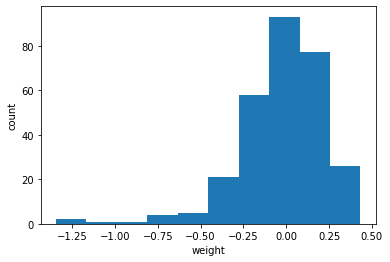

In [45]:
plt.hist(conv_weights.reshape(-1,1))  
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

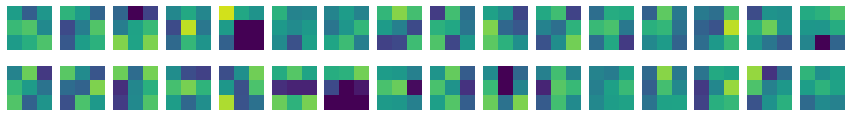

In [46]:
fig, axs = plt.subplots(2,16, figsize = (15,2))

for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin = -0.5, vmax = 0.5)
    axs[i,j].axis('off')

plt.show()

In [49]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3, activation='relu', padding='same', input_shape = (28,28,1)))
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [50]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

0.0012437839 0.08054042


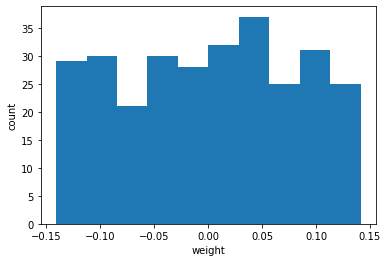

In [52]:
plt.hist(no_training_weights.reshape(-1,1))  
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

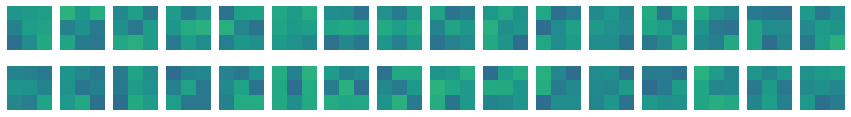

In [53]:
fig, axs = plt.subplots(2,16, figsize = (15,2))

for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin = -0.5, vmax = 0.5)
    axs[i,j].axis('off')

plt.show()